# 密集热点区域无线网络区域的性能分析与优化

## 课题来源

- 超密集组网中区域频谱效率理论上界及干扰管理算法研究。
    - 自然科学基金,项目编号：61671186

## 主要研究内容

- 场景：超密集组网
- 架构：C-RAN
- 研究问题：密集热点区域无线网络的性能分析与优化

# 超密集组网

- 有效提升区域面积谱效率
- 基站部署的随机性
    - 泊松点过程
- 用户的不均匀性
    - 用户依附热点服从高斯分布


# C-RAN

- 基站资源池(BBUs) + 远拉射频头(RRHs)
    - 集中化处理(Centralized Processing)
    - 协作式无线电(Collaborative Radio)
    - 实时云计算构架(Real-time Cloud Infrastructure)
    - 绿色无线接入网构架(Clean system)

- 优点
    - 将所有独立的小区看成整体
    - 共同管理，共享它们的物理层资源
    - 有效的解决小区间干扰。
    - 有很高的可扩展性。


# 超密集组网下的基站分布示意图

- 基站出现在各个位置是等概的
- 每个基站分布的位置独立
- 基站由泊松点过程生成器生成
- 区域基站的分布可以等效为随机分布

In [2]:
import numpy as np
from hot_service_region import HotServiceRegion
from service_region import ServiceRegion
import matplotlib.pyplot as plt
region = HotServiceRegion()
region.set_region(0, 200, 0, 200)
region.set_hot_density(1.0/400)
region.set_P_sum(10.0)
region.set_small_fade('Rayleigh')
region.set_hot_point_distribution('Uniform')
region.set_hot_point()

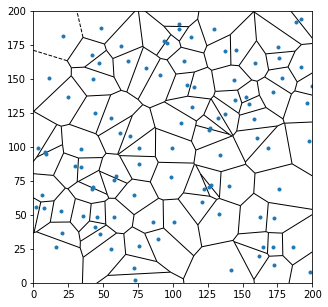

In [4]:
region.set_hot_point_as_BS()
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
region.plot_BS_voronoi(ax)
plt.show()

# 超密集组网覆盖区域的容量分布图

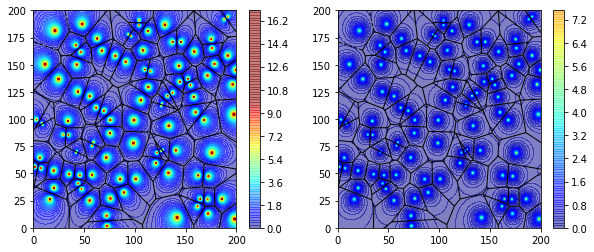

In [5]:
region.set_small_fade(small_fade='no_small_fade')
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 2, 1)
region.set_loss_factor(4.0)
region.plot_ergodic_capacity_contour()
region.plot_BS_voronoi(ax, show_points_or_not=False)
ax = fig.add_subplot(1, 2, 2)
region.set_loss_factor(2.0)
region.plot_ergodic_capacity_contour()
region.plot_BS_voronoi(ax, show_points_or_not=False)
fig.savefig('small_ergodic_capacity.tiff', bbox_inches='tight')
plt.show()

- 距离基站较近的区域遍历容量较好
- 距离基站较远的区域遍历容量较差
- 边缘用户收到干扰的影响，遍历容量较差

- 得到结论: 用户距离服务基站过远、以及处于基站服务的边缘区，用户的遍历容量较差

# 超密集组网覆盖区域性能的指标

可以定义两个指标去衡量整个覆盖区域的性能:
- 覆盖率: $p_c(T,\lambda,\alpha) = \mathbb{P}[\mathsf{SINR}>T]$
    - 物理意义:
        1. 服务用户的信干燥比为T以上的概率
        2. 信干燥比为T以上的用户占总用户的百分比
        3. 信噪比为T以上的区域占总区域的百分比
- 区域面积谱效率:
$\tau(\lambda, \alpha) = \lambda \mathbb{E}[\log_2(1+\mathsf{SINR})]$
    - 物理意义
        - 单位面积上所承载的平均和容量

## 区域覆盖率的分析

在当前场景下，由于基站部署的越来越密集，小基站的部署已经不在是固定格形的部署，基站呈现随机性。
要求去区域覆盖率，首先要对基站服务的用户进行统计建模。

可供选择的模式有两种:
- 用户在区域内也服从均匀分布
- 用户围绕热点区域服从二维高斯分布

为满足吞吐率的要求，基站将服务于热点区域，因此将用户的统计模型建模成围绕基站服从二维高斯分布更加合理。

用户和基站在区域内的示意图如下：

当标准差$\sigma=3.0$时:

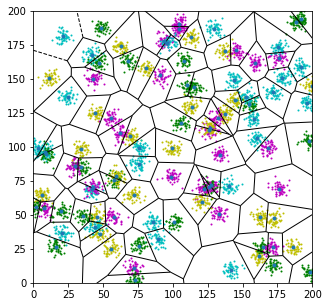

In [6]:
region.set_UE_density(0.2)
region.set_UE_distribution('Gaussian', 3.0)
region.set_UE()
region.set_all_UE()
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
region.plot_BS_voronoi(ax)
region.plot_UE_scatter()

当标准差$\sigma=5.0$时：

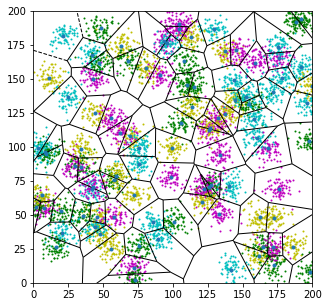

In [7]:
region.set_UE_density(0.1)
region.set_UE_distribution('Gaussian', 5.0)
region.set_UE()
region.set_all_UE()
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
region.plot_BS_voronoi(ax)
region.plot_UE_scatter()

当标准差$\sigma=7.0$时:

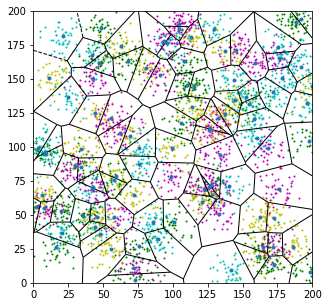

In [8]:
region.set_UE_distribution('Gaussian', 7.0)
region.set_UE_density(0.03)
region.set_UE()
region.set_all_UE()
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
region.plot_BS_voronoi(ax)
region.plot_UE_scatter()

基本场景总结如下：
- **链路:** 
    - 下行链路
    - 所有链路采用相同的时频资源
- **信道:**
    - 干扰受限信道
    - 忽略加性高斯噪声对链路的影响
- **基站:**
    - 基站的部署服从泊松点过程
    - 每个基站配备有一根天线
    - 基站部署在热点的中心
    - 所有基站的发射功率相等
- **用户:**
    - 用户围绕热点服从二维高斯核分布
    - 给个用户配备有一根天线
    - 用户选择距其最近的基站作为其服务基站
    - 用户受到除服务基站外的所有基站的干扰

相关参数如下:

|基本参数|表示|
|:----------:|:------------:|
|基站密度|$\lambda$|
|基站功率|$\mu$|
|路径损耗系数|$\alpha$|
|小尺度衰落系数|$h$|
|用户分布的标准差|$\sigma$|
|用户距离热点的距离|$D$|
|用户距离最近基站的距离|$r$|

其中:
- 小尺度衰落系数$h$服从参数为基站功率$\mu$服从指数分布, 表示为$\mu \sim exp(1/\mu)$
- 不失一般的假设热点中心的坐标为$(x,y)$, 则属于该热点的用户距离热点的距离$D\sim \mathcal{N}\left((x,y), \sigma^2\right)$

根据前面的介绍, 覆盖率的定义为, 信噪比达到T的概率:
$$
p_c(T,\lambda,\alpha, \sigma) = \mathbf{P}\left(\mathsf{SINR}>T\right)
$$
可以等效为给定距离最近基站的距离$r$的覆盖率对$r$的距离:
$$
p_c(T,\lambda,\alpha, \sigma) = \mathbb{E}_r\left[\mathbf{P}\left(\mathsf{SINR}>T\mid r\right)\right]
$$


因为热点基站是随机分布的, 可以不是一般性的讨论单个热点的情况, 即可以得到整个区域的覆盖率情况.

假设观测用户距除其热点处的基站以外的最近的基站为$R$.

该条件均值可以分成两种情况讨论:
- 当所观测用户的服务基站即为其所属的热点的基站$(D<R)$
- 当所观测用户的服务基站为其他基站$(D>R)$

用数学表达式即为:
$$
\mathbb{E}_r\left[\mathbf{P}\left(\mathsf{SINR}>T\mid r\right)\right] = \mathbb{E}_r\left[\mathbf{P}\left(\mathsf{SINR}>T\mid D < R\right)\right] + \mathbb{E}_r\left[\mathbf{P}\left(\mathsf{SINR}>T\mid D > R\right)\right]
$$

- 基站距热点的基站的距离服从高斯分布$D\sim \mathcal{N}\left(0, \sigma^2\right)$, 即:
$$
f_D(D)= \frac{D}{\sigma^2} e^{-\frac{D^2}{2\sigma^2}} 
$$
- 由于基站的分布是泊松点过程, 因此基站距除热点基站以外最近的基站的距离的平方服从指数分布, 即:
$$
f_R(R)=e^{-\lambda\pi R^2} 2\pi R.
$$


上述条件概率可用下述积分式表达:
$$
P_c(T, \lambda, \alpha,\sigma) = \int_0^{\infty}\int_D^{+\infty}\mathbf{P}\left(\mathsf{SINR}>T\mid D\right)\ f_R(R)\ f_D(D)\ \mathrm{d}R\ \mathrm{d}D 
+\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\  
\int^{\infty}_0\int_0^{D}\mathbf{P}\left(\mathsf{SINR}>T\mid R,D\right)\ f_R(R)\ f_D(D)\ \mathrm{d}R\ \mathrm{d}D
$$

即根据全概率公式,总的覆盖率可以分解为
- 事件一: 所观测用户的服务基站即为其所属的热点的基站且该用户能达到覆盖所需的信噪比
- 事件二: 当所观测用户的服务基站为其他基站且该用户能达到覆盖所需的信噪比

两个事件概率的加和.


事件一的干扰为随机分布于距离$D$以外的总干扰.

事件二的干扰为随机分布于距离$R$以外的总干扰和热点基站对其的干扰的总和.

由于当事件二发生时,不是距热点基站较远, 就是距其服务基站较近, 因此热点基站对其的影响可以忽略不计, 上述积分式就可以表达为:
$$
\begin{align}
P_c(T, \lambda, \alpha,\sigma) = \int_0^{+\infty}\int_D^{+\infty}\mathbf{P}\left(\mathsf{SINR}>T\mid D\right)\ f_R(R)\ f_D(D)\ \mathrm{d}R\ \mathrm{d}D \\
+\int^{+\infty}_0\int_0^{D}\mathbf{P}\left(\mathsf{SINR}>T\mid R\right)\ f_R(R)\ f_D(D)\ \mathrm{d}R\ \mathrm{d}D
\end{align}
$$

随机分布的基站下给定距离后的覆盖率$\mathbf{P}\left(\mathsf{SINR}>T\mid r\right)$, 可以由对干扰值求聚生成函数得到[1].
$$
\mathbf{P}\left(\mathsf{SINR}>T\mid r\right) = \pi\lambda e^{-\pi\lambda r^2(1+\rho(T,\alpha))}
$$
其中:
$$
\rho(T,\alpha)=T^{2/\alpha}\int_{T^{-2/\alpha}}^{\infty} \frac{1}{1+u^{\alpha/2}}\ \mathrm{d}u
$$

带入, 求积分即可得到整个区域的覆盖率的表达式:
$$
P_c(T,\lambda,\alpha,\sigma) =  \frac{1}{1+\rho(T,\alpha)} + \frac{\rho(T, \alpha)}{1+\rho(T,\alpha)} \cdot \frac{1}{2\pi\sigma^2\lambda(1+\rho(T,\alpha))+1}
$$
其中:
$$
\rho(T,\alpha)=T^{2/\alpha}\int_{T^{-2/\alpha}}^{\infty} \frac{1}{1+u^{\alpha/2}}\ \mathrm{d}u
$$

等式的前半部分已由[1]给出, 为当用户的分布为随机分布时的覆盖率

# 对该场景下区域覆盖率表达式的讨论

可以看到, 该场景下的区域覆盖率主要与热点用户分布的方差$\sigma$,基站的密度$\sigma$,信道的路径损耗因数$\alpha$有关系.

- 当用户覆盖所需的信干比较小的时候, 第一项起主导的作用, 当用户覆盖所需的信干比较大的时候, 第二项起主导作用.
- 覆盖率随着热点区域的密度的增加而减少, 随着用户分布的方差的增大而减少.
- 在覆盖所需的信干比较大的时候, 覆盖率与密度成反比,与用户分布的方差成反比

## 不同的损耗系数对覆盖率的影响
以损耗系数$\alpha$为2.0和4.0作为比较. 给定用户分布的标准差$\sigma=5.0$, 基站的密度为1个/400$\mathrm{m}^2$.可以看到当$\alpha$较大时虽然接收的有用功率减小, 但因为干扰基站更多, 干扰功率受到$\alpha$的影响更大. 因此覆盖率随着损耗系数的增大右移.

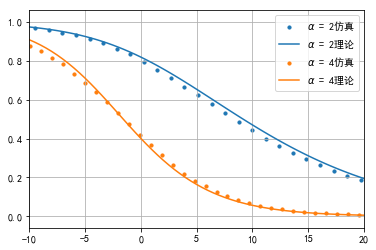

In [36]:
# -*- coding:utf-8 -*-
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
region.set_loss_factor(4.0)
region.set_UE_density(0.1)
region.set_UE_distribution('Gaussian', 5.0)
region.set_UE()
region.set_all_UE()
region.set_small_fade('Rayleigh')

f1 = region.plot_hot_UE_SIR_ccdf()
f2, = region.plot_hot_SIR_ccdf_theory(-10, 20)
region.set_loss_factor(2.0)
region.set_UE()
region.set_all_UE()
region.set_small_fade('Rayleigh')
f3 = region.plot_hot_UE_SIR_ccdf()
f4, = region.plot_hot_SIR_ccdf_theory(-10, 20)
plt.xlim(-10, 20)
plt.legend(handles=[f1, f2, f3, f4], labels=[ur"$\alpha$ = 2仿真",
                                             ur"$\alpha$ = 2理论",
                                             ur"$\alpha$ = 4仿真",
                                             ur"$\alpha$ = 4理论"], loc='best')
plt.grid(True)
plt.show()

## 不同基站密度对覆盖率的影响
以基站的密度为1个/1000$\mathrm{m}^2$, 1个/400$\mathrm{m}^2$, 1个/100$\mathrm{m}^2$三个场景作为比较. 给定用户分布的标准差$\sigma=5.0$, 路径损耗因子$\alpha=4.0$. 可以看到随着密度的增加覆盖率逐渐左移.

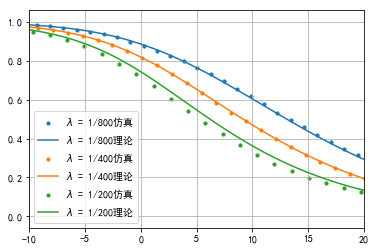

In [28]:
region1 = HotServiceRegion(0, 200, 0, 200, 10.0, 0.01, 4.0, 'Rayleigh')
region1.set_hot_point_distribution('Uniform')
region1.set_hot_density(1.0/800)
region1.set_hot_point()
region1.set_hot_point_as_BS()
region1.set_UE_density(0.1)
region1.set_UE_distribution('Gaussian', 5.0)
region1.set_UE()
region1.set_all_UE()
f1 = region1.plot_hot_UE_SIR_ccdf()
f2, = region1.plot_hot_SIR_ccdf_theory(-10, 20)

region1.set_hot_density(1.0/400)
region1.set_hot_point()
region1.set_hot_point_as_BS()
region1.set_UE_density(0.1)
region1.set_UE_distribution('Gaussian', 5.0)
region1.set_UE()
region1.set_all_UE()
f3 = region1.plot_hot_UE_SIR_ccdf()
f4, = region1.plot_hot_SIR_ccdf_theory(-10, 20)

region1.set_hot_density(1.0/200)
region1.set_hot_point()
region1.set_hot_point_as_BS()
region1.set_UE_density(0.1)
region1.set_UE_distribution('Gaussian', 5.0)
region1.set_UE()
region1.set_all_UE()
f5 = region1.plot_hot_UE_SIR_ccdf()
f6, = region1.plot_hot_SIR_ccdf_theory(-10, 20)
plt.xlim(-10, 20)
plt.legend(handles=[f1, f2, f3, f4, f5, f6], labels=[ur"$\lambda$ = 1/800仿真",
                                                     ur"$\lambda$ = 1/800理论",
                                                     ur"$\lambda$ = 1/400仿真",
                                                     ur"$\lambda$ = 1/400理论",
                                                     ur"$\lambda$ = 1/200仿真",
                                                     ur"$\lambda$ = 1/200理论"], loc='best')
plt.grid(True)
plt.show()

## 不同用户分布的标准差对覆盖率的影响
以用户分布的标准差$\sigma$为3.0, 5.0, 10.0作为比较, 同时也与当用户为均匀分布的情况下做出了对比. 给定基站的密度为1个/400$\mathrm{m}^2$, 路径损耗因子$\alpha=4.0$. 可以看到随着用户分布标准差的增大覆盖率逐渐左移, 当$\sigma$逐渐增大, 覆盖率逐渐的区域用户为均匀分布时场景的覆盖率.

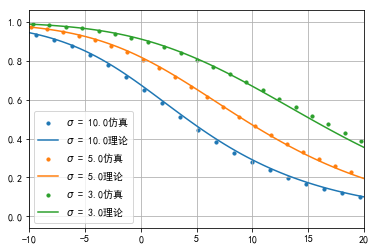

In [54]:
from service_region import ServiceRegion
from hot_service_region import HotServiceRegion
region1 = HotServiceRegion()
region1.set_loss_factor(4.0)
region1.set_region(0, 200, 0, 200)
region1.set_hot_density(1.0/400)
region1.set_P_sum(10.0)
region1.set_small_fade('Rayleigh')
region1.set_hot_point_distribution('Uniform')
region1.set_hot_point()
region1.set_hot_point_as_BS()
region1.set_UE_density(1)

region1.set_UE_distribution('Gaussian', 10.0)
region1.set_UE()
region1.set_all_UE()
f1 = region1.plot_hot_UE_SIR_ccdf()
f2, = region1.plot_hot_SIR_ccdf_theory(-10, 20)

region1.set_UE_density(1)
region1.set_UE_distribution('Gaussian', 5.0)
region1.set_UE()
region1.set_all_UE()
f3 = region1.plot_hot_UE_SIR_ccdf()
f4, = region1.plot_hot_SIR_ccdf_theory(-10, 20)

region1.set_UE_distribution('Gaussian', 3.0)
region1.set_UE_density(1)
region1.set_UE()
region1.set_all_UE()
f5 = region1.plot_hot_UE_SIR_ccdf()
f6, = region1.plot_hot_SIR_ccdf_theory(-10, 20)

#f7 = region1.plot_cdf()
#f8, = region1.plot_SIR_ccdf_theory(-10, 20)

plt.xlim(-10, 20)
plt.legend(handles=[f1, f2, f3, f4, f5, f6, f7, f8], labels=[ur"$\sigma$ = 10.0仿真",
                                                             ur"$\sigma$ = 10.0理论",
                                                             ur"$\sigma$ = 5.0仿真",
                                                             ur"$\sigma$ = 5.0理论",
                                                             ur"$\sigma$ = 3.0仿真",
                                                             ur"$\sigma$ = 3.0理论"], loc='best')
plt.grid(True)
plt.show()

## 区域频谱效率的求取

求取的方法和覆盖率的求取方法基本相同.
根据区域面积普效率的定义:
$$
\tau(\lambda, \alpha) = \lambda \mathbb{E}[\log_2(1+\mathsf{SIR})]
$$

根据公式:
$$
\mathbb{E}(X)=\int_{t>0}\mathbf{P}\left(X>t\right)\ \mathrm{d}t
$$
上式可以改写为:
$$
\begin{align}
\tau(\lambda, \alpha) &= \int_{t>0} \mathbf{P}\left[\log_2(1+\mathsf{SIR}) > t\right] \mathrm{d}t \\
&=\int_{t>0} \mathbf{P}\left(SIR > 2^t - 1\right)\mathrm{d}t \\
&=\int_{t>0} P_c(2^t-1, \lambda,\alpha,\sigma)\ \mathrm{d}t \\
&=\int_{t>0}\frac{1}{1+\rho(2^t-1,\alpha)} + \frac{\rho(2^t-1, \alpha)}{1+\rho(2^t-1,\alpha)} \cdot \frac{1}{2\pi\sigma^2\lambda(1+\rho(2^t-1,\alpha))+1}\ \mathrm{d}t
\end{align}
$$

其中,
$$
\rho(T,\alpha)=T^{2/\alpha}\int_{T^{-2/\alpha}}^{\infty} \frac{1}{1+u^{\alpha/2}}\ \mathrm{d}u
$$

## 区域频谱效率的数值分析

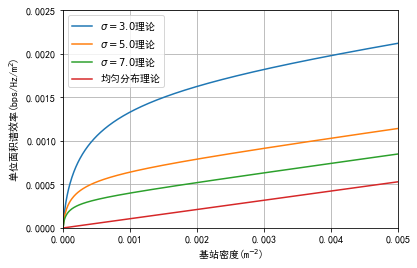

In [74]:
import numpy as np
from hot_service_region import HotServiceRegion
from service_region import ServiceRegion
from theory import capacity_theory, capacity_theory2
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
density = np.arange(0.0, 0.0051, 0.00001)
c1 = np.empty(np.shape(density))
c3 = np.empty(np.shape(density))
c5 = np.empty(np.shape(density))
c7 = np.empty(np.shape(density))
for i, value in enumerate(density):
    c3[i] = capacity_theory(value, 4.0, 3.0)
    c5[i] = capacity_theory(value, 4.0, 5.0)
    c7[i] = capacity_theory(value, 4.0, 7.0)
    c1[i] = capacity_theory2(value, 4.0, 3.0)
f1, = plt.plot(density, c3)
f2, = plt.plot(density, c5)
f3, = plt.plot(density, c7)
f4, = plt.plot(density, c1)
plt.xlim(0, 0.005)
plt.ylim(0, 0.0025)
plt.xlabel(ur'基站密度(m$^{-2}$)')
plt.ylabel(ur'单位面积谱效率(bps/Hz/m${^2}$)')
plt.legend([f1, f2, f3, f4],
           [ur'$\sigma=3.0$理论',
            ur'$\sigma=5.0$理论',
            ur'$\sigma=7.0$理论',
            ur'均匀分布理论'])
plt.grid(True)
plt.show()

以用户分布的标准差$\sigma$为3.0, 5.0, 7.0作为比较, 同时也与当用户为均匀分布的情况下做出了对比, 路径损耗因子$\alpha=4.0$. 给定基站的密度从0到0.005个/$\mathrm{m}^2$. 随着方差逐渐增大, 场景的区域面积谱效率越来越接近均匀分布的场景. 在热点场景下, 区域面积谱效率首先随着基站密度的增加迅速增加, 之后随着基站密度的增加区域面积谱效率呈现线性的增加.

## 热点区域下的基站协作集的选择

根据高斯分布的特性, 处于1个标准差之内的用户占总用户数的68%. 如果两个基站相距两个标准差以内, 则说明处于两个基站的边缘的统计概率较大. 可以将这样的两个基站进行协作, 通过C-RAN技术共享其信道信息, 通过预编码技术, 从而一直干扰, 达到提高覆盖率与区域频谱效率的目的.

基站协作选择的算法如下:

- **Step 1:** 构造图, 图中的节点为区域中的所有基站. 每个节点记录被其表示的基站的坐标.
- **Step 2:** 搜索全部的节点对, 如果两个节点对中坐标的距离小于用户分布的标准差的两倍, 则生成一个边将两个节点链接.
- **Step 3:** 按深度遍历图中的所有节点. 即可将图中的节点进行分组.

由泊松点过程生成的基站如下：

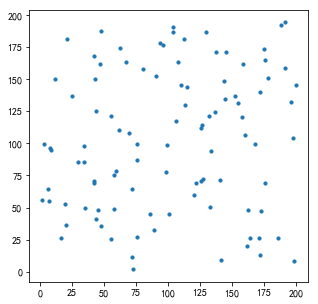

In [55]:
fig = plt.figure(figsize=(5,5))
plt.scatter(region.hot_point_X, region.hot_point_Y, s=10)
plt.show()

In [56]:
class dfsk(object):
    def __init__(self):
        pass
    
    def dfs(self, distance_logic, node, position, num):
        if node not in self.visited_node:
            self.visited_node = np.append(self.visited_node, node)
        for i in range(num):

            if i not in self.visited_node\
                    and i != node\
                    and distance_logic[node, i] == 1:

                np.append(self.visited_node, i)
                plt.plot(position[[i,node],0],position[[i,node],1])
                self.dfs(distance_logic, i, position, num)
            else:
                continue
    visited_all = np.array([], dtype=np.int)
    def near_distance_means_dict(self, num, distance_logic, position):
        near_distance_dict = {}
        clusters = 0
        for i in range(0, num):
            if i not in self.visited_all:
                self.dfs(distance_logic, i, position, num)
                near_distance_dict[clusters] = self.visited_node
                self.visited_all = np.append(self.visited_all,
                                             self.visited_node)
                self.visited_node = np.array([], dtype=np.int)
                clusters += 1
            else:
                continue
        self.visited_all = np.array([])
        return near_distance_dict

    visited_node = np.array([], dtype=np.int)


应用上述方法找到的协作基站的示意图如下图所示

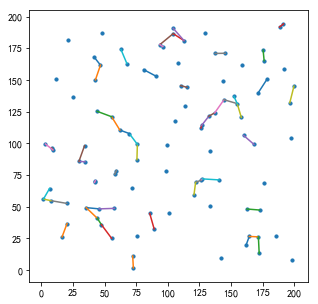

In [57]:
distance_vector = (region.hot_point_position[:, :, np.newaxis]
                   - region.hot_point_position.T[np.newaxis, :])
distance = np.sqrt(np.sum(np.square(distance_vector), axis=1))
sigma = 7
distance_logic = np.zeros(np.shape(distance), dtype=np.int)
distance_logic[distance <= sigma * 2] = 1
distance_logic[distance > sigma * 2] = 0
a = dfsk()
fig = plt.figure(figsize=(5, 5))
dicta = a.near_distance_means_dict(region.hot_point_num,
                                     distance_logic,
                                     region.hot_point_position)
plt.scatter(region.hot_point_X, region.hot_point_Y, s=10)
plt.show()

可以看到相距较近的基站被选择了出来，以便于之后的协作

# 基站部署(EM验证)

用户的统计信息如下图所示:

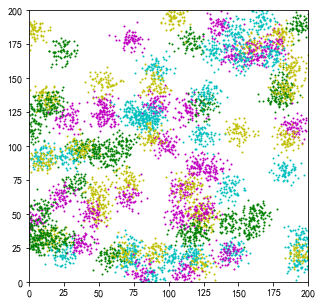

In [58]:
import numpy as np
from hot_service_region import HotServiceRegion
from service_region import ServiceRegion
import matplotlib.pyplot as plt
region = HotServiceRegion()
region.set_region(0, 200, 0, 200)
region.set_hot_density(1.0/400)
region.set_P_sum(10.0)
region.set_small_fade('Rayleigh')
region.set_hot_point_distribution('Uniform')
region.set_hot_point()
region.set_UE_density(0.1)
region.set_UE_distribution('Gaussian', 5.0)
region.set_UE()
region.set_all_UE()
region.set_hot_point_as_BS()
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
region.plot_UE_scatter()
plt.xlim(0,200)
plt.ylim(0,200)
plt.show()

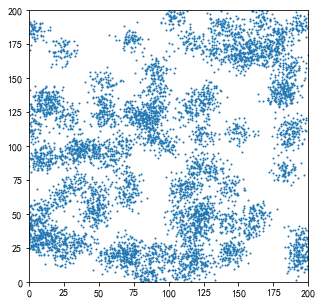

In [59]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(region.all_UE_X, region.all_UE_Y, s=1)
plt.xlim(0,200)
plt.ylim(0,200)
plt.show()

In [67]:
from sklearn.mixture import GaussianMixture 

采用EM最大法的基站部署示意图如下:

In [76]:
gmm = GaussianMixture(n_components=region.hot_point_num,
                     covariance_type='spherical',
                     init_params='kmeans',
                     verbose=0,
                     warm_start=1,
                     max_iter=100)

In [77]:
gmm.fit(region.all_UE_position.T)

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=100, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=1,
        weights_init=None)

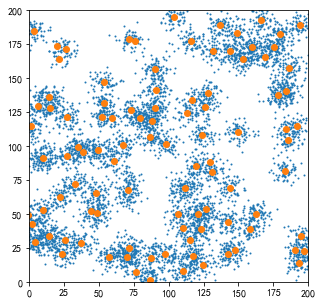

In [70]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(region.all_UE_X, region.all_UE_Y, s=1)
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])
plt.xlim(0,200)
plt.ylim(0,200)
plt.show()

热点的Voronoi图:

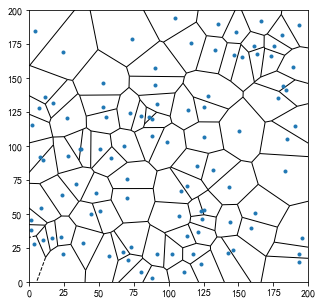

In [71]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
region.plot_BS_voronoi(ax)
plt.xlim(0,200)
plt.ylim(0,200)
plt.show()

基站的Voronoi图:

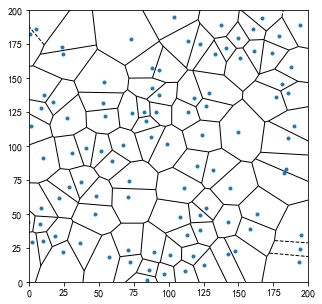

In [78]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
region.BS_position = gmm.means_
region.plot_BS_voronoi(ax)
plt.xlim(0,200)
plt.ylim(0,200)
plt.show()

覆盖率的性能分析如下图所示:

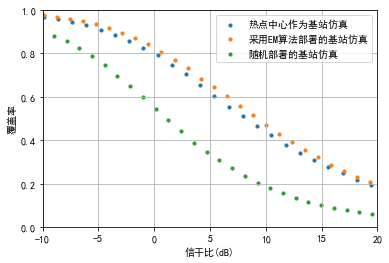

In [73]:
region.set_hot_point_as_BS()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
f1 = region.plot_hot_UE_SIR_ccdf()
region.BS_position = gmm.means_
region.BS_X = region.BS_position[:,0]
region.BS_Y = region.BS_position[:,1]
f2 = region.plot_hot_UE_SIR_ccdf()
region.set_BS()
f3 = region.plot_hot_UE_SIR_ccdf()
plt.xlim(-10,20)
plt.ylim(0,1)
plt.legend([f1,f2,f3],[u'热点中心作为基站仿真',
                       u'采用EM算法部署的基站仿真',
                       u'随机部署的基站仿真'])
plt.xlabel(u'信干比(dB)')
plt.ylabel(u'覆盖率')
plt.grid(True)
plt.savefig('deploy.png', bbox_inches='tight')
plt.show()

# 参考文献
[1] Andrews, Jeffrey G and Baccelli, François and Ganti, Radha Krishna, “A tractable approach to coverage and rate in cellular networks,“IEEE Transactions on Communications, vol.59, no.11, pp.3122–3134, Nov. 2011

In [75]:
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

Toggle Code